Integrantes do grupo:

**Pedro de Paula Gonçalves - 2023003517**\
**Pedro Nogueira Barboza - 2023006500**

Importação de Bibliotecas

In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics as st # para usar a função mean, median, mode, variance, stdev
import seaborn as sns # pode carregar datasets dentro da própria lib
from scipy.stats import binom # para poder realizar cálculos de distribuição binomial
from scipy.stats import poisson # para poder realizar cálculos de distribuição de poisson

## Análise Geográfica

In [124]:
# "geolocation_zip_code_prefix","geolocation_lat","geolocation_lng","geolocation_city","geolocation_state"
dados_geograficos = pd.read_csv('olist_geolocation_dataset.csv') # esse dataset contém informações de localização onde os pedidos foram realizados

# "product_id","product_category_name","product_name_lenght","product_description_lenght","product_photos_qty","product_weight_g","product_length_cm","product_height_cm","product_width_cm"
dados_dos_produtos = pd.read_csv('olist_products_dataset.csv') # esse dataset contém dados do id do produto, categoria do produto, tamanho do nome do produto, tamanho da descrição do produto, quantidade de fotos do produto, peso do produto, comprimento do produto, altura do produto e largura do produto

# "order_id","customer_id","order_status","order_purchase_timestamp","order_approved_at","order_delivered_carrier_date","order_delivered_customer_date","order_estimated_delivery_date"
dados_dos_pedidos = pd.read_csv('olist_orders_dataset.csv') # esse dataset contém informações dos pedidos, como id do pedido, id do cliente, status do pedido, data de compra, data de aprovação, data de envio, data de entrega e data estimada de entrega

# "order_id","order_item_id","product_id","seller_id","shipping_limit_date","price","freight_value"
dados_dos_itens_do_pedido = pd.read_csv('olist_order_items_dataset.csv') # esse dataset contém dados do id do pedido, id do item do pedido, id do produto, id do vendedor, data limite de envio, preço e valor do frete

dado_dos_clientes = pd.read_csv('olist_customers_dataset.csv') 

avaliacoes =  pd.read_csv('olist_order_reviews_dataset.csv')

metodos_de_pagamento = pd.read_csv('olist_order_payments_dataset.csv')


dados_geograficos.head()




,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


## Fazendo Merge dos datasets

In [125]:
todos_pedidos = pd.merge(dados_dos_pedidos, dados_dos_itens_do_pedido)

pedidos_e_produtos = pd.merge(todos_pedidos, dados_dos_produtos, on="product_id") # faz o merge dos datasets de pedidos e produtos com base no id do produto

dados_cliente_pedidos = pd.merge(todos_pedidos, dado_dos_clientes, on='customer_id')

dados_itens_pedidos_produtos = pd.merge(dados_dos_itens_do_pedido, dados_dos_produtos, on='product_id')

pedidos_produtos = pd.merge(dados_itens_pedidos_produtos, dados_cliente_pedidos, on='order_id')

pedidos_avaliacoes = pd.merge(dados_dos_pedidos, avaliacoes[['order_id', 'review_score']], on='order_id')









In [126]:
# Remover valores nulos em 'review_score', se houver
avaliacoes = avaliacoes.dropna(subset=['review_score'])

# Remover as linhas com valores nulos na coluna 'order_delivered_customer_date'
dados_dos_pedidos.dropna(subset=['order_delivered_customer_date'], inplace=True)

# Remover registros inválidos
dados_dos_pedidos = dados_dos_pedidos.dropna(subset=['order_delivered_customer_date', 'order_purchase_timestamp'])

# Remover as linhas onde 'payment_type' é 'not_defined'
metodos_de_pagamento = metodos_de_pagamento[metodos_de_pagamento['payment_type'] != 'not_defined']

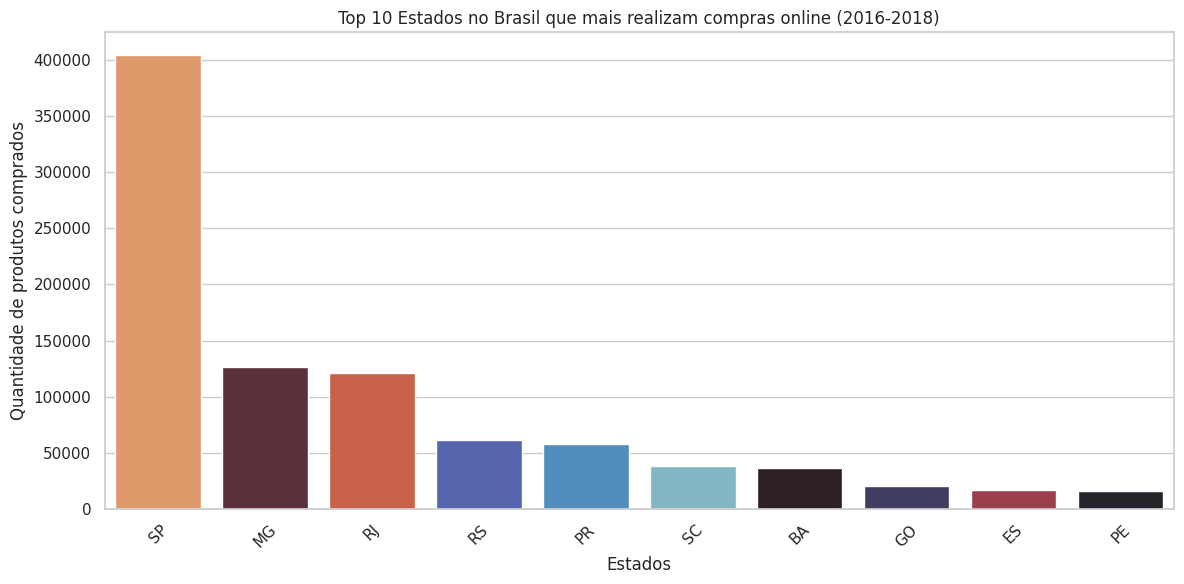

In [127]:
# Primeiro, obtenha os 10 estados com maiores contagens
top_10_estados = dados_geograficos['geolocation_state'].value_counts().nlargest(10).index

# Filtre os dados para incluir apenas esses estados
dados_top_10_estados = dados_geograficos[dados_geograficos['geolocation_state'].isin(top_10_estados)]

# Agora, crie o gráfico usando os dados filtrados
plt.figure(figsize=(12,6))
sns.countplot(x='geolocation_state', data=dados_top_10_estados, 
              order=dados_top_10_estados['geolocation_state'].value_counts().index, 
              palette='icefire_r', 
              hue='geolocation_state', 
              dodge=False,
              legend=False)
plt.title('Top 10 Estados no Brasil que mais realizam compras online (2016-2018)')
plt.xlabel('Estados')
plt.ylabel('Quantidade de produtos comprados')
plt.xticks(rotation=45)
plt.legend([],[], frameon=False)  # Remove a legenda vazia
plt.tight_layout()
plt.show()


## Análise dos tipos de Produtos

Juntando os arquivos de produtos e de vendas em um único dataframe

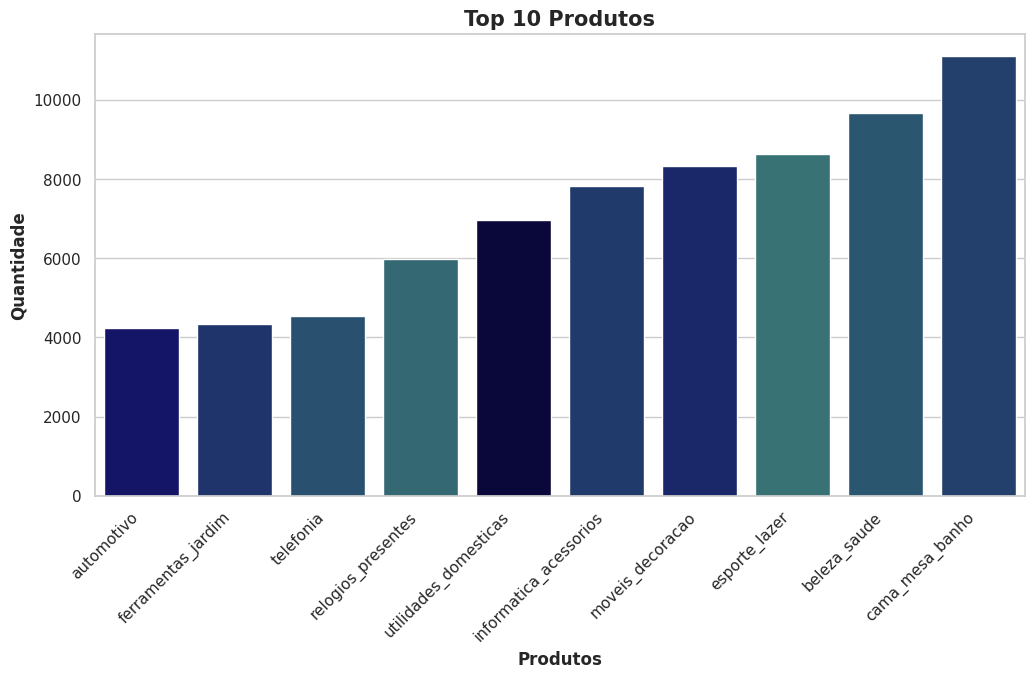

In [135]:
# Criar o gráfico
plt.figure(figsize=(12,6))
ax = sns.countplot(x='product_category_name', data=pedidos_e_produtos, palette='gist_earth',hue='product_category_name',
                   order=pedidos_e_produtos['product_category_name'].value_counts()[:10].sort_values().index)

# Definir o título do gráfico
ax.set_title("Top 10 Produtos", fontsize=15, weight='bold')
ax.set_xlabel('Produtos', fontsize=12, weight='bold')
ax.set_ylabel('Quantidade', fontsize=12, weight='bold')

# Ajustar os rótulos do eixo x para melhorar a legibilidade
plt.xticks(rotation=45, ha='right')
plt.legend([],[], frameon=False)  # Remove a legenda para não sobrecarregar o gráfico

# Exibir o gráfico
plt.show()


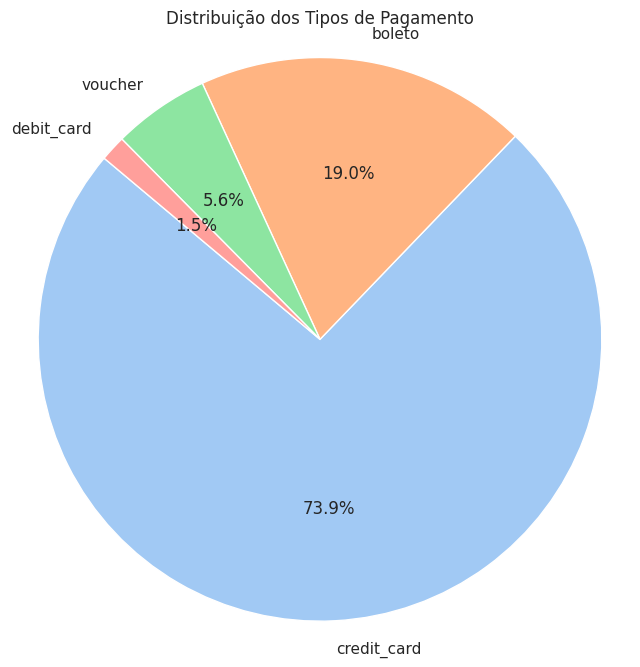

In [129]:
# Contar a frequência de cada tipo de pagamento
contagem_pagamentos = metodos_de_pagamento['payment_type'].value_counts()

# Obter os labels e valores para o gráfico
labels = contagem_pagamentos.index
sizes = contagem_pagamentos.values

# Definir as cores (opcional)
colors = sns.color_palette('pastel')[0:len(labels)]

# Criar o gráfico de pizza
plt.figure(figsize=(8,8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)

# Configurações adicionais
plt.title('Distribuição dos Tipos de Pagamento')
plt.axis('equal')  # Assegura que o gráfico seja desenhado como um círculo

# Exibir o gráfico
plt.show()


In [130]:
def plot_top_products_pie_chart(df, state_code, top_n=5):
    # Filtrar os dados para o estado especificado
    df_state = df[df['customer_state'] == state_code]
    
    # Contar a frequência de cada produto
    product_counts = df_state['product_category_name'].value_counts()
    
    # Obter os top N produtos
    top_products = product_counts.nlargest(top_n)
    
    # Calcular a porcentagem
    top_products_percent = 100 * top_products / top_products.sum()
    
    # Criar o gráfico de pizza
    plt.figure(figsize=(8,8))
    plt.pie(top_products_percent, labels=top_products.index, autopct='%1.1f%%', startangle=140)
    plt.title(f'Top {top_n} Produtos Mais Comprados em {state_code}')
    plt.axis('equal')  # Assegura que o gráfico seja desenhado como um círculo
    plt.show()

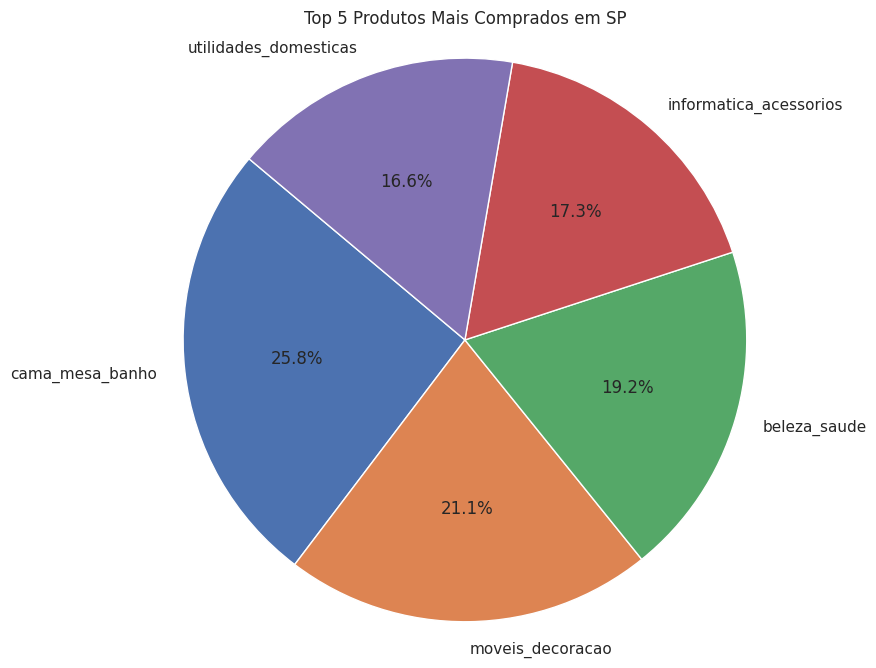

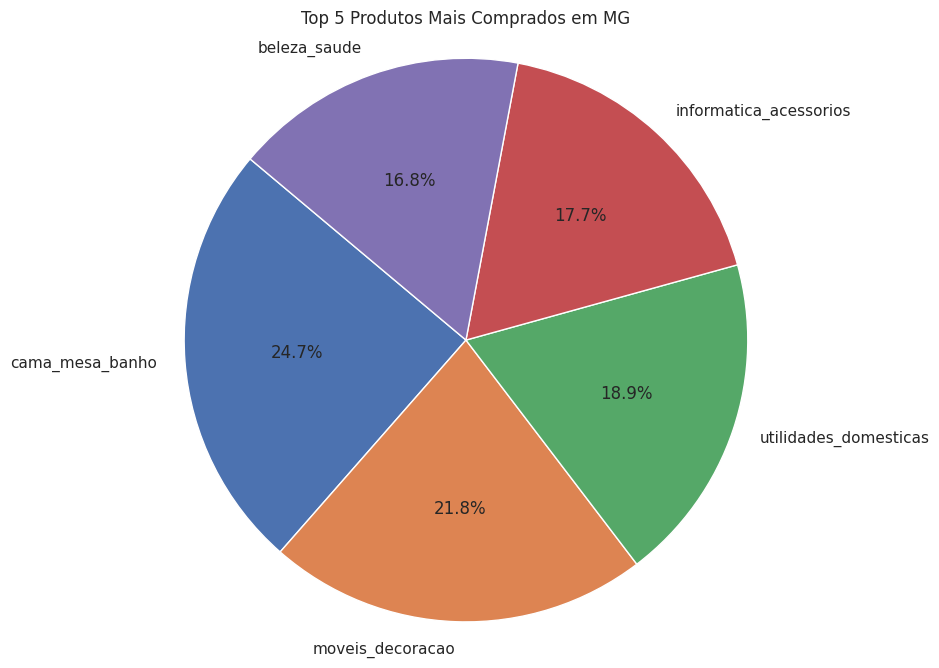

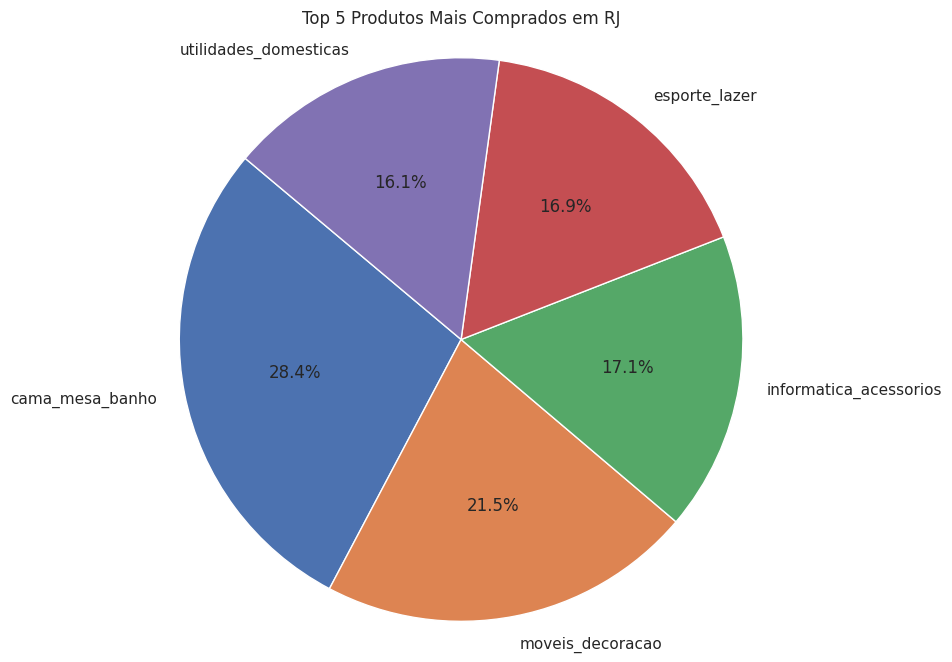

In [131]:
# Para São Paulo (SP)
plot_top_products_pie_chart(pedidos_produtos, 'SP')

# Para Minas Gerais (MG)
plot_top_products_pie_chart(pedidos_produtos, 'MG')

# Para Rio de Janeiro (RJ)
plot_top_products_pie_chart(pedidos_produtos, 'RJ')

   year  num_purchases
2  2016            370
1  2017          49765
0  2018          62511
3  2020              4


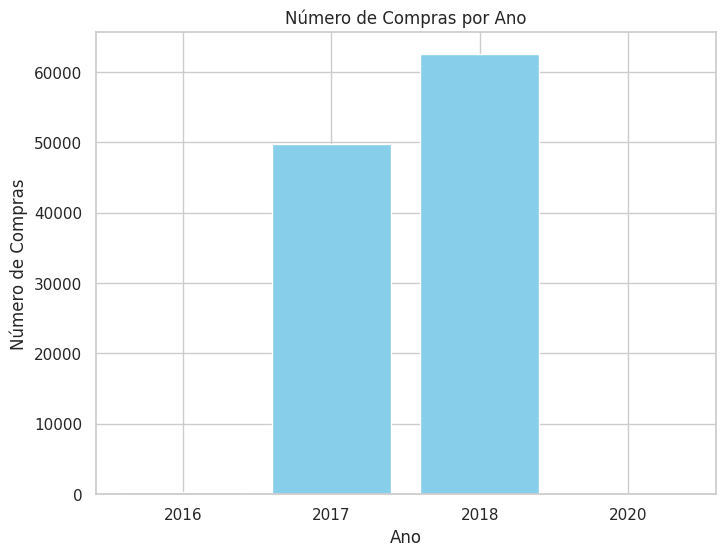

In [132]:
# Converter 'shipping_limit_date' para datetime
dados_dos_itens_do_pedido['shipping_limit_date'] = pd.to_datetime(dados_dos_itens_do_pedido['shipping_limit_date'])

# Extrair o ano
dados_dos_itens_do_pedido['year'] = dados_dos_itens_do_pedido['shipping_limit_date'].dt.year

# Contar compras por ano
purchases_per_year = dados_dos_itens_do_pedido['year'].value_counts().reset_index()
purchases_per_year.columns = ['year', 'num_purchases']
purchases_per_year = purchases_per_year.sort_values('year')

# Exibir os dados
print(purchases_per_year)

# Criar o gráfico
plt.figure(figsize=(8,6))
plt.bar(purchases_per_year['year'].astype(str), purchases_per_year['num_purchases'], color='skyblue')
plt.title('Número de Compras por Ano')
plt.xlabel('Ano')
plt.ylabel('Número de Compras')
plt.show()


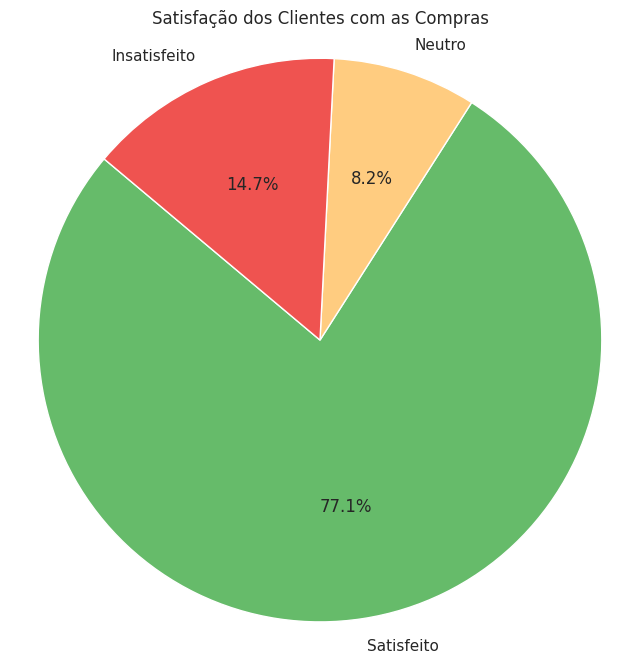

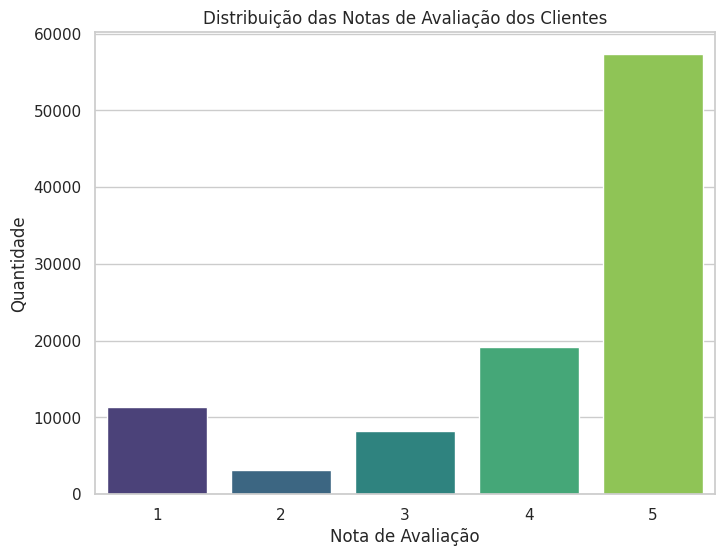

In [133]:


# Categorizar a satisfação do cliente
def categorize_satisfaction(score):
    if score >= 4:
        return 'Satisfeito'
    elif score == 3:
        return 'Neutro'
    else:
        return 'Insatisfeito'

avaliacoes['satisfaction'] = avaliacoes['review_score'].apply(categorize_satisfaction)

# Contar a frequência de cada categoria de satisfação
satisfaction_counts = avaliacoes['satisfaction'].value_counts().reindex(['Satisfeito', 'Neutro', 'Insatisfeito'])

# Gráfico de Pizza
labels = satisfaction_counts.index
sizes = satisfaction_counts.values

plt.figure(figsize=(8,8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=['#66bb6a', '#ffcc80', '#ef5350'])
plt.title('Satisfação dos Clientes com as Compras')
plt.axis('equal')
plt.show()

# Contar a frequência de cada nota de avaliação
score_counts = avaliacoes['review_score'].value_counts().sort_index()

# Gráfico de Barras
labels = score_counts.index.astype(str)
sizes = score_counts.values

plt.figure(figsize=(8,6))
sns.barplot(x=labels, y=sizes, palette='viridis', hue=labels)
plt.title('Distribuição das Notas de Avaliação dos Clientes')
plt.xlabel('Nota de Avaliação')
plt.ylabel('Quantidade')
plt.show()


order_id                          0
customer_id                       0
order_status                      0
order_purchase_timestamp          0
order_approved_at                14
order_delivered_carrier_date      1
order_delivered_customer_date     0
order_estimated_delivery_date     0
delivery_time                     0
dtype: int64


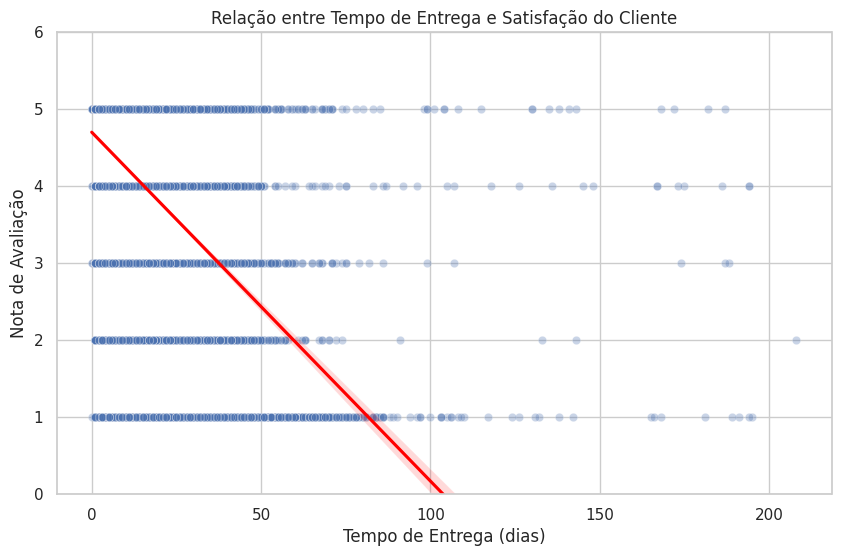

In [134]:

# Converter colunas de data para datetime
dados_dos_pedidos['order_purchase_timestamp'] = pd.to_datetime(dados_dos_pedidos['order_purchase_timestamp'])
dados_dos_pedidos['order_delivered_customer_date'] = pd.to_datetime(dados_dos_pedidos['order_delivered_customer_date'])

# Calcular o tempo de entrega em dias
dados_dos_pedidos['delivery_time'] = (dados_dos_pedidos['order_delivered_customer_date'] - dados_dos_pedidos['order_purchase_timestamp']).dt.days

# Remover registros inválidos
# Verificar valores nulos
print(dados_dos_pedidos.isnull().sum())


dados_dos_pedidos = dados_dos_pedidos[dados_dos_pedidos['delivery_time'] >= 0]

# Unir os dados de pedidos com as avaliações
pedidos_avaliacoes = pd.merge(dados_dos_pedidos, avaliacoes[['order_id', 'review_score']], on='order_id')

plt.figure(figsize=(10,6))
sns.scatterplot(x='delivery_time', y='review_score', data=pedidos_avaliacoes, alpha=0.3)
sns.regplot(x='delivery_time', y='review_score', data=pedidos_avaliacoes, scatter=False, color='red')
plt.title('Relação entre Tempo de Entrega e Satisfação do Cliente')
plt.ylim(0,6)  # Limitar o eixo Y entre 0 e 5, o intervalo esperado para a nota de avaliação

plt.xlabel('Tempo de Entrega (dias)')
plt.ylabel('Nota de Avaliação')
plt.show()
